# See whats in data

In [2]:
import pandas as pd
import numpy as np

In [3]:
completed_deals = pd.read_csv('./data/completed-or-current-deails-2019-10-29.csv')

completed_deals = completed_deals.groupby('Associated Company')['Deal ID','Associated Company','Deal Name', 'Deal owner', 'Deal Stage','Sales Lead','Designated Office','Director','Industry', 'Source'].first()

completed_deals.head()

,Deal ID,Associated Company,Deal Name,Deal owner,Deal Stage,Sales Lead,Designated Office,Director,Industry,Source
Associated Company,,,,,,,,,,
42 North Dental LLC,884051240,42 North Dental LLC,NHDG,Brad Ediger,Client,Dennis Moore,Chicago,Brad Ediger,Health Care,Employee Referral
8to18,262866761,8to18,8 to 18 - Maintenance (DevOps),Margaret Pagel,Completed,Margaret Pagel,Chicago,Malcolm Newsome,Government,Existing client referral
Accordion Partners,270588007,Accordion Partners,Accordion Partners - Maestro Playbook App,Connor Mendenhall,Completed,Dennis Moore,New York,Connor Mendenhall,Financial,Existing client referral
ActiWit,262808529,ActiWit,Mobile app + headband to help patients w/ADHD.,Ray Hightower (Deactivated User),Completed,NaN,Chicago,Kevin Kotowski,Health Care,NaN
ActiveCampaign,287255301,ActiveCampaign,ActiveCampaign - Mentoring/teaching through fe...,Ryan Verner,Completed,Dennis Moore,Chicago,heather corallo,NaN,Existing client referral


In [4]:
by_stage = completed_deals.groupby('Deal Stage')['Deal Stage'].count()
print(by_stage)

Deal Stage
Client        49
Completed    138
Name: Deal Stage, dtype: int64


In [5]:
lost_deals = pd.read_csv('./data/lost-deals-2019-10-28-1.csv')

lost_deals = lost_deals.groupby('Associated Company')['Deal ID','Associated Company','Deal Name','Deal owner', 'Deal Stage','Sales Lead','Designated Office','Director','Industry', 'Source'].first()

lost_deals.head()

,Deal ID,Associated Company,Deal Name,Deal owner,Deal Stage,Sales Lead,Designated Office,Director,Industry,Source
Associated Company,,,,,,,,,,
@esparkslearning,262844207,@esparkslearning,@esparkslearning,Paul Pagel,Lost,Margaret Pagel,Chicago,NaN,NaN,Referral
12 Threads,262779173,12 Threads,12 Threads/Miguel Ascencious,Margaret Pagel,Lost,Margaret Pagel,NaN,NaN,NaN,Website
4moms,262844176,4moms,4moms,Margaret Pagel,Lost,Margaret Pagel,Chicago,Dave Moore,NaN,Website
528 Records,262844292,528 Records,528 Records,Ray Hightower (Deactivated User),Lost,NaN,Chicago,Kevin Kotowski,NaN,Website
8to18,262808344,8to18,8 to 18,Margaret Pagel,Lost,Margaret Pagel,NaN,Doug Bradbury,NaN,Trade Show


In [0]:
by_source = completed_deals.groupby('Source')['Source'].count()
print(by_source)

In [0]:
by_source = lost_deals.groupby('Source')['Source'].count()
print(by_source)

## By Deal owner

In [0]:
by_deal_owner = completed_deals.groupby('Deal owner')['Deal owner'].count()
print(by_deal_owner)

In [0]:
by_deal_owner = lost_deals.groupby('Deal owner')['Deal owner'].count()
print(by_deal_owner)

## By Industry

In [0]:
completed_deals['Industry'].value_counts()

In [0]:
lost_deals['Industry'].value_counts()

In [0]:
completed_by_industry_count = completed_deals.groupby('Industry').size().sort_index().reset_index()
completed_by_industry_count.columns = ['Industry', 'Completed count']

lost_by_industry_count = lost_deals.groupby('Industry').size().sort_index().reset_index()
lost_by_industry_count.columns = ['Industry', 'Lost count']

industry_comparison = pd.merge(completed_by_industry_count, lost_by_industry_count, on='Industry')

industry_comparison.head(25)

In [0]:
industry_comparison.plot(x='Industry', kind='bar')

## By Designated Office

In [0]:
by_office = completed_deals.groupby('Designated Office')['Designated Office'].count()
print(by_office)

In [0]:
by_office = lost_deals.groupby('Designated Office')['Designated Office'].count()
print(by_office)

## By source

In [31]:
completed_deals['Source'].value_counts()

Existing client referral    40
Employee Referral           18
Upsell                      18
Referral                    16
Website                     10
Expansion                    4
Extension                    3
Cold Call                    2
None                         1
Trade Show                   1
EO                           1
Import                       1
Name: Source, dtype: int64

In [32]:
lost_deals['Source'].value_counts()

Website                     54
Existing client referral    39
Employee Referral           31
Referral                    30
Upsell                      14
Trade Show                   6
Expansion                    3
Extension                    3
EO                           2
Toll Free Number             1
None                         1
Cold Call                    1
Name: Source, dtype: int64

In [6]:
completed_by_source_count = completed_deals.groupby('Source').size().sort_index().reset_index()
completed_by_source_count.columns = ['Source', 'Completed count']

lost_by_source_count = lost_deals.groupby('Source').size().sort_index().reset_index()
lost_by_source_count.columns = ['Source', 'Lost count']

sources_comparison = pd.merge(completed_by_source_count, lost_by_source_count, on='Source')

sources_comparison.head(25)

,Source,Completed count,Lost count
0,Cold Call,2,1
1,EO,1,2
2,Employee Referral,18,31
3,Existing client referral,40,39
4,Expansion,4,3
5,Extension,3,3
6,None,1,1
7,Referral,16,30
8,Trade Show,1,6
9,Upsell,18,14


In [9]:
sources_comparison['Source'] = sources_comparison['Source'].replace('None', np.nan)
sources_comparison = sources_comparison[~sources_comparison['Source'].isnull()]
sources_comparison.head(25)

,Source,Completed count,Lost count
0,Cold Call,2,1
1,EO,1,2
2,Employee Referral,18,31
3,Existing client referral,40,39
4,Expansion,4,3
5,Extension,3,3
7,Referral,16,30
8,Trade Show,1,6
9,Upsell,18,14
10,Website,10,54


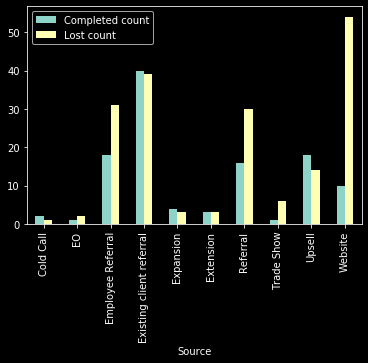

In [11]:
sources_comparison.plot(x=column_name, kind='bar')

In [41]:
sources_comparison['Efficency'] = sources_comparison['Completed count'] / (sources_comparison['Completed count'] + sources_comparison['Lost count']) * 100

sources_comparison = sources_comparison.sort_values(by=['Efficency'], ascending=True)

sources_comparison.head(30)

,Source,Completed count,Lost count,Efficency
8,Trade Show,1,6,14.285714
10,Website,10,54,15.625000
1,EO,1,2,33.333333
7,Referral,16,30,34.782609
2,Employee Referral,18,31,36.734694
5,Extension,3,3,50.000000
6,None,1,1,50.000000
3,Existing client referral,40,39,50.632911
9,Upsell,18,14,56.250000
4,Expansion,4,3,57.142857


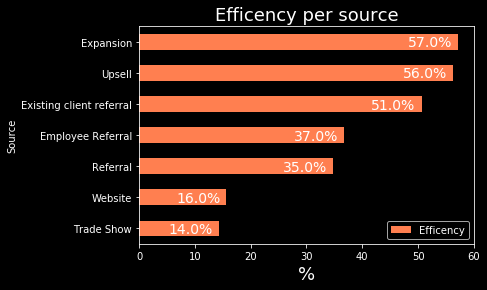

In [78]:
efficency_chart = sources_comparison[['Source','Efficency']].copy()

efficency_chart['Number of deals'] = sources_comparison['Completed count'] + sources_comparison['Lost count']

efficency_chart = efficency_chart[efficency_chart['Number of deals'] >= 7]

graph = efficency_chart[['Source','Efficency']].plot(x='Source', kind='barh', color='coral')

#graph.set_alpha(0.8)
graph.set_title("Efficency per source", fontsize=18)
graph.set_xlabel("%", fontsize=18)

def show_efficency_value(i):
    value = str(round(i.get_width()))
    return value+"%"

for i in graph.patches:
    graph.text(i.get_width() - 9, i.get_y() + 0.1, show_efficency_value(i), fontsize=14)


# Combined features

In [80]:
lost_combo = lost_deals.groupby(['Industry', 'Source'])['Industry', 'Source'].size().sort_index().reset_index()
lost_combo.columns = ['Industry', 'Source', 'Count']
lost_combo = lost_combo.sort_values(by=['Count'], ascending=False)
lost_combo.head(25)

,Industry,Source,Count
10,Financial,Existing client referral,7
2,E-commerce,Employee Referral,5
9,Financial,Employee Referral,4
6,E-commerce,Referral,3
24,Insurance,Existing client referral,3
27,Non Profit,Existing client referral,2
20,Health Care,Referral,2
4,E-commerce,Expansion,2
5,E-commerce,Extension,2
7,E-commerce,Upsell,2


In [81]:
completed_combo = completed_deals.groupby(['Industry', 'Source'])['Industry', 'Source'].size().sort_index().reset_index()
completed_combo.columns = ['Industry', 'Source', 'Count']
completed_combo = completed_combo.sort_values(by=['Count'], ascending=False)
completed_combo.head(45)

,Industry,Source,Count
23,Health Care,Existing client referral,6
27,Insurance,Existing client referral,4
4,E-commerce,Existing client referral,4
12,Financial,Existing client referral,4
22,Health Care,Employee Referral,3
3,E-commerce,Employee Referral,3
7,E-commerce,Upsell,3
20,Government,Existing client referral,3
11,Financial,Employee Referral,3
16,Financial,Website,2
